# Lec 1
## 课程: 
* Development
* Evaluation
* Testing
* Fairness

Josh Gordon (joshua@cs.columbia.edu)

主要用到python，还有一些javascript.

colab

## Intro
* Most Kaggle competitions involving **perception** are won by **tree-based** models. <br>
**Key advantage**: can explain predictions. (DL也可以做，特别与图像有关时，但不那么准确)
* Most Kaggle competitions involving **structured data** are won by **DL-based** models.

### Linear models:
##### 1. 
$\hat{y} = g(\theta_0+\sum\limits_{i=1}^m x_i \theta_i)=g(\theta_0+X^T \theta)$. 
这其中$\hat{y}$是输出，$g(\cdots)$是nonlinear activation function, $\theta_0$是bias, $\sum\limits_{i=1}^m x_i \theta_i$是linear combination of inputs.
$x_i$是inputs, $\theta_i$是weights.



##### 2. When is linear models effective:
* Structured data (a table)
* Many simple features (demographic info)
* Willing to do feature engineering (feature crosses, bucketing)

**Activation Functions**
* Sigmoid: $g(z) = \frac{1}{1+e^{-z}}$
* Hyperbolic Tangent: $g(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}$
* ReLU: $g(z) = \max(0,z)$

### Feature engineering:
给的例子是如下图，原本不可以linear separable. 但是加了一个新的feature: z=x^2+y^2, 就可以根据z linear separable了。

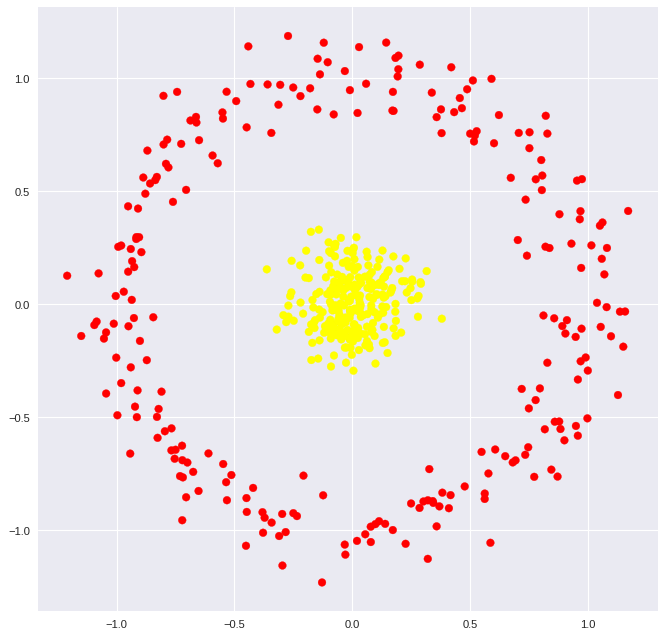

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
plt.figure(figsize=(10,10),dpi=80)
X,y=make_circles(500, factor=.1, noise=.1)
# X are the location of samples and y are binary labels
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

## DL Concepts
#### 1. Activation function: introduce non-linearities in the network.
<img src="NotePic/Lec1-2.png" width="90%">

#### 2. Neuron: a logistic unit (简化版)
<img src="NotePic/Lec1-3.png" width="40%">

#### 3. Neural network
<img src="NotePic/Lec1-4.png" width="80%">

#### 4. Forward pass: a series of matrix multiples (one per layer) followed by pointwise application of a non-linearity.
*另个老师课上称为forward propagation. 总之，都是先Wx，线性weight加和；再非线性的activation function.
举例：
* A linear score function: $f=Wx$
* A single hidden layer with ReLU activation: $f=W_2\max(0, W_1x)$
* Two Hidden layers: $f = W_3\max(0,W_2\max(0, W_1x))$

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
# Handwritten Digit Recognition dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Guide of Sequential model in keras: https://keras.io/zh/getting-started/sequential-model-guide/
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 16s 264us/step - loss: 0.2032 - acc: 0.9397
Epoch 2/5
60000/60000 [==============================] - 16s 263us/step - loss: 0.0821 - acc: 0.9747
Epoch 3/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.0517 - acc: 0.9836
Epoch 4/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.0387 - acc: 0.9873
Epoch 5/5
10000/10000 [==============================] - 1s 58us/step


[0.06130692958681903, 0.9818]